In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline 

In [329]:
#Show the first 5 elements of the training set
training_set = pd.read_csv("train.csv")
training_set.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [330]:
#Show the first 5 elements of the test set
test_set = pd.read_csv("test.csv")
test_set.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [331]:
print("Shape of training set=",training_set.shape)
print("Shape of test set=",test_set.shape)

Shape of training set= (1460, 81)
Shape of test set= (1459, 80)


In [332]:
#summary on all the non-categorical values
training_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


skewness= 1.8828757597682129
kurtosis= 6.536281860064529


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sale Price'),
 Text(0.5, 1.0, 'Range of Sale Price')]

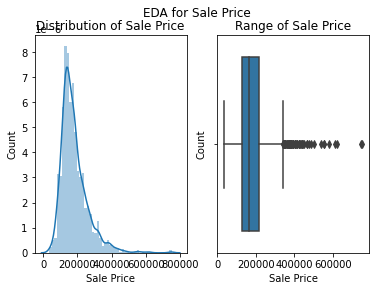

In [333]:
#Finding about the dependent variable "SalePrice"'s distribution
print("skewness=",training_set['SalePrice'].skew())
print("kurtosis=",training_set['SalePrice'].kurt())

f, axs = plt.subplots(nrows= 1,ncols = 2,)
f.suptitle("EDA for Sale Price")
sns.distplot(training_set["SalePrice"],ax = axs[0])
axs[0].set(xlabel='Sale Price' , ylabel='Count', title="Distribution of Sale Price")
sns.boxplot(training_set["SalePrice"],ax = axs[1])
axs[1].set(xlabel='Sale Price', ylabel='Count', title="Range of Sale Price")



#ax.text("Distribution of House prices in Ames")
#axs.text(x = 0.05, y = 0.05, s = "Skewness: %f" % training_set['SalePrice'].skew())


In [334]:
#Finding count of categorical and non-categorical values
#We notice that we have 43 object types and 35 integer types
print("\nCount of all datatypes")
print(training_set.dtypes.value_counts())
print("\nnon-categorical variables")
print(training_set.select_dtypes(exclude=['object']).columns)
print("\ncategorical variables")
print(training_set.select_dtypes(include=['object']).columns)
#training_set.corr()


Count of all datatypes
object     43
int64      35
float64     3
dtype: int64

non-categorical variables
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

categorical variables
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQua

In [335]:
#datatypes of all columns
#Using group by statement to group all columns according to their datatypes
groupby_datatypes = {str(k): ', '.join(list(v)) for k, v in training_set.groupby(training_set.dtypes, axis = 1)}
for i in groupby_datatypes:
  print(i,":", groupby_datatypes[i])



int64 : Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice
float64 : LotFrontage, MasVnrArea, GarageYrBlt
object : MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition


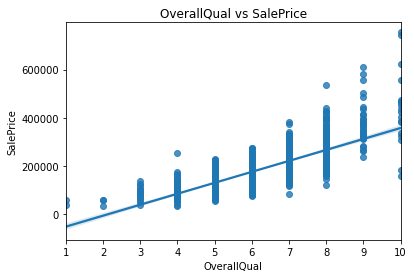

pearson_co-efficient= 0.79  p-value= 2.185675268e-313


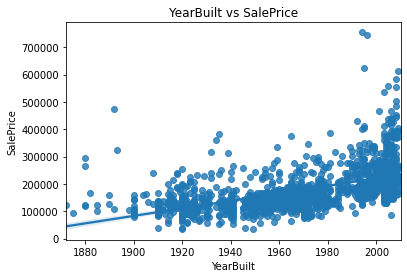

pearson_co-efficient= 0.52  p-value= 2.9902290990158995e-103


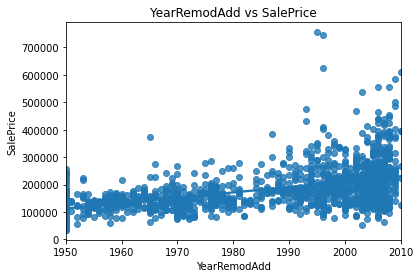

pearson_co-efficient= 0.51  p-value= 3.1649482419207935e-96


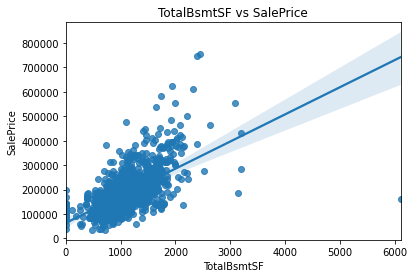

pearson_co-efficient= 0.61  p-value= 9.484229391507914e-152


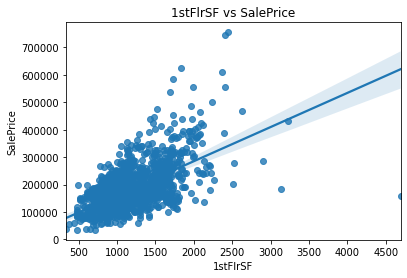

pearson_co-efficient= 0.61  p-value= 5.394710618971284e-147


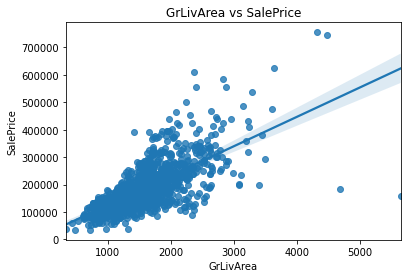

pearson_co-efficient= 0.71  p-value= 4.518033646779431e-223


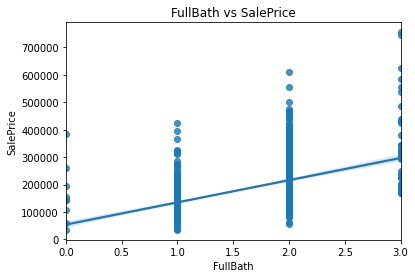

pearson_co-efficient= 0.56  p-value= 1.236470066760862e-121


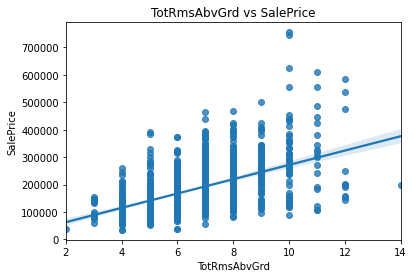

pearson_co-efficient= 0.53  p-value= 2.772280932958432e-108


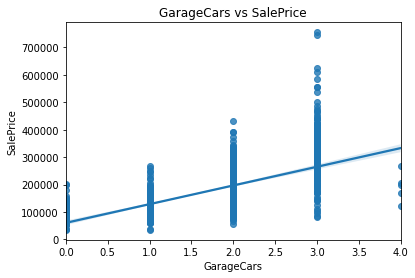

pearson_co-efficient= 0.64  p-value= 2.4986441671792262e-169


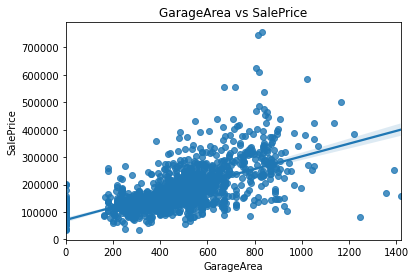

pearson_co-efficient= 0.62  p-value= 5.2650381679778054e-158


In [336]:
#Let us see the relationship of every variable wrt to Sale Price by using a Pearson Correlation coefficient and a regplot and let us try to plot only those variables which are 
#more then 0.5 or less than -0.5 to ensure they are moderately to strongly correlated
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0:
    pearson_coef, p_value = stats.pearsonr(training_set[i], training_set["SalePrice"])
    if pearson_coef <= -0.5 or pearson_coef >= 0.5:
      fig, axs = plt.subplots(1)
      sns.regplot(x = i, y = "SalePrice", data=training_set).set_title(i+" vs SalePrice")
      plt.show()
      print("pearson_co-efficient= %.2f" % pearson_coef, " p-value=", p_value)


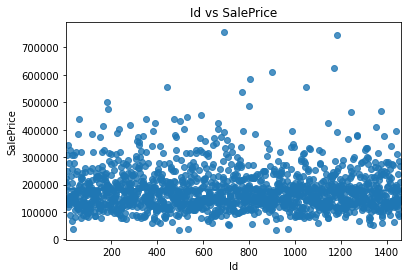

pearson_co-efficient= -0.02  p-value= 0.40269379975602987


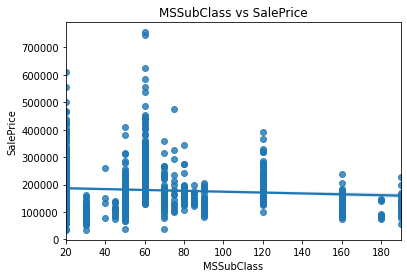

pearson_co-efficient= -0.08  p-value= 0.0012664716847503312


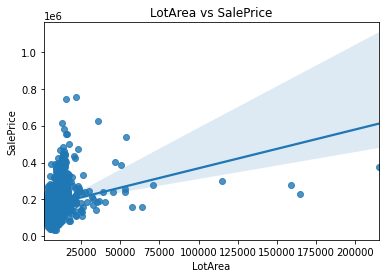

pearson_co-efficient= 0.26  p-value= 1.123139154919434e-24


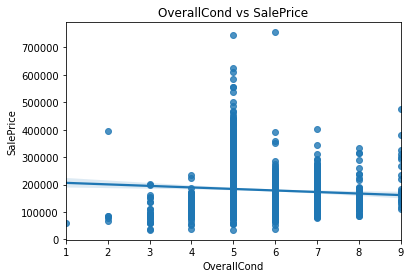

pearson_co-efficient= -0.08  p-value= 0.0029123512679174826


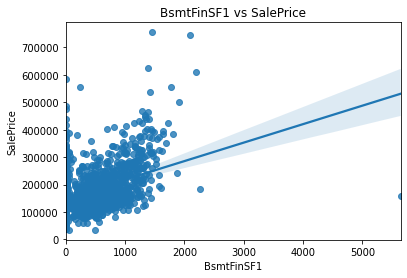

pearson_co-efficient= 0.39  p-value= 3.3941098292907553e-53


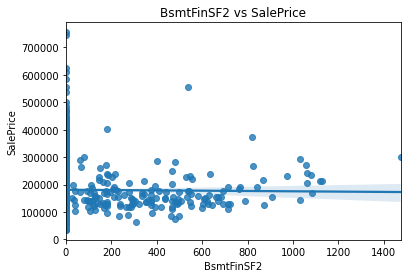

pearson_co-efficient= -0.01  p-value= 0.663998650834577


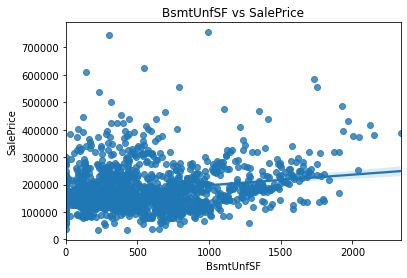

pearson_co-efficient= 0.21  p-value= 1.1829757963602225e-16


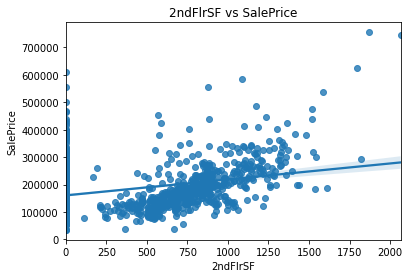

pearson_co-efficient= 0.32  p-value= 5.764335119183061e-36


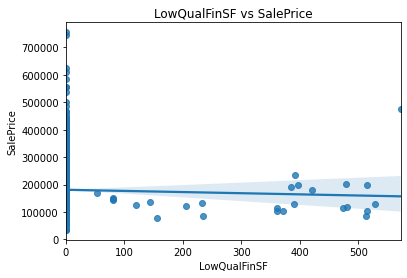

pearson_co-efficient= -0.03  p-value= 0.32820730984074886


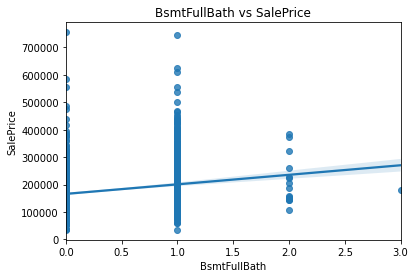

pearson_co-efficient= 0.23  p-value= 1.550344137214128e-18


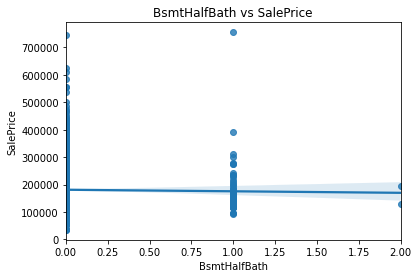

pearson_co-efficient= -0.02  p-value= 0.5201536357280931


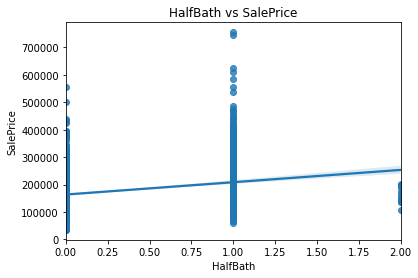

pearson_co-efficient= 0.28  p-value= 1.6504733955727557e-28


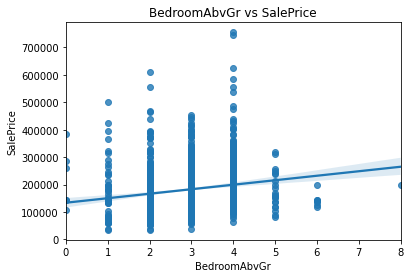

pearson_co-efficient= 0.17  p-value= 9.927497326186164e-11


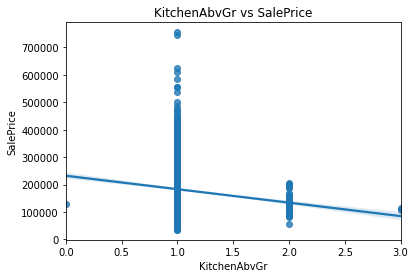

pearson_co-efficient= -0.14  p-value= 1.8604260320766925e-07


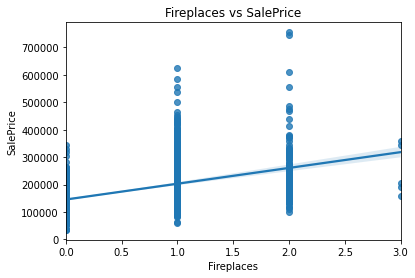

pearson_co-efficient= 0.47  p-value= 6.141487461119229e-80


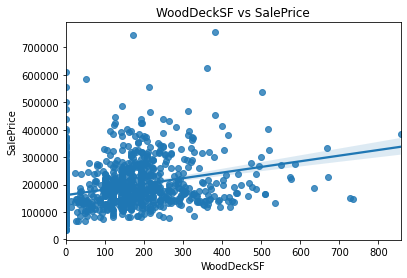

pearson_co-efficient= 0.32  p-value= 3.972216535629994e-37


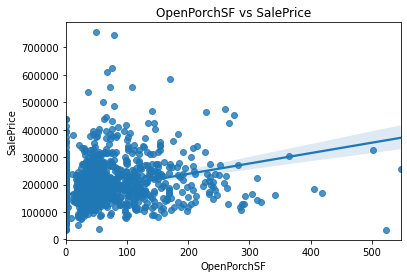

pearson_co-efficient= 0.32  p-value= 3.49337362309738e-35


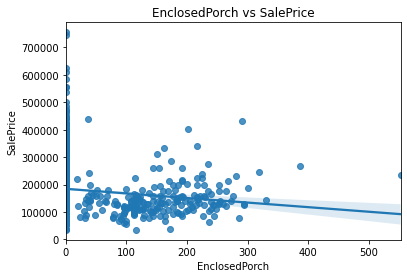

pearson_co-efficient= -0.13  p-value= 8.255770475119532e-07


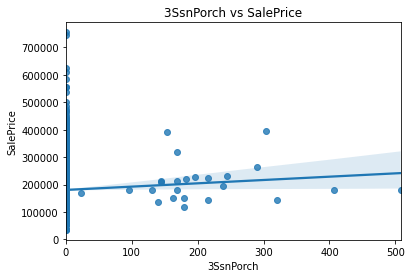

pearson_co-efficient= 0.04  p-value= 0.08858170358062883


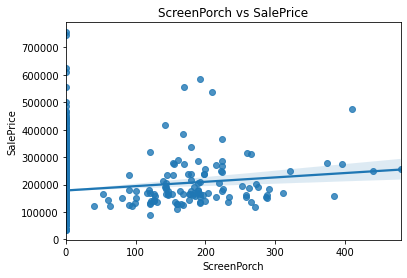

pearson_co-efficient= 0.11  p-value= 1.9721400194702135e-05


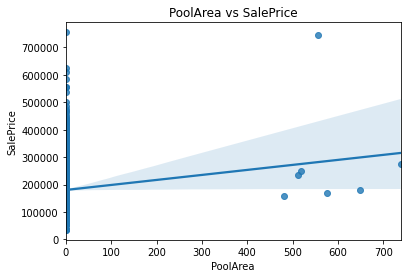

pearson_co-efficient= 0.09  p-value= 0.0004073489601199127


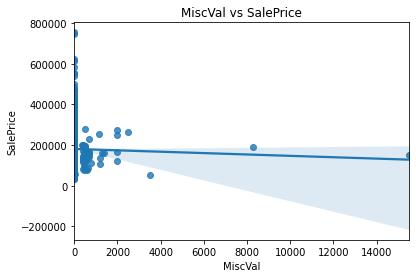

pearson_co-efficient= -0.02  p-value= 0.4184863494082891


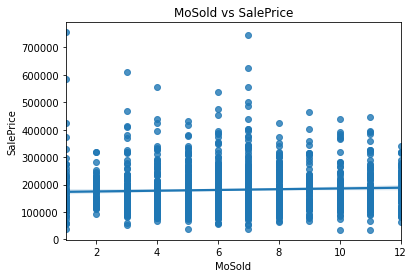

pearson_co-efficient= 0.05  p-value= 0.07612757850609941


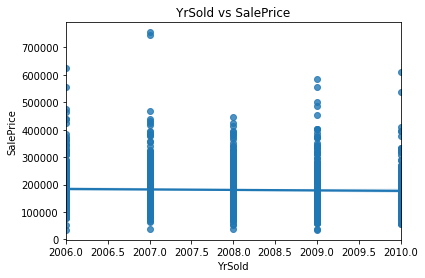

pearson_co-efficient= -0.03  p-value= 0.26941319328103863


In [337]:
#display relationships between other non-categorical variables and SalePrice whose Pearson coefficient is between -0.5 to 0.5, We find that 
#These variables aren't correlated with the sale price strongly
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0:
    pearson_coef, p_value = stats.pearsonr(training_set[i], training_set["SalePrice"])
    if pearson_coef > -0.5 and pearson_coef < 0.5:
      fig, axs = plt.subplots(1)
      sns.regplot(x = i, y = "SalePrice", data=training_set).set_title(i+" vs SalePrice")
      plt.show()
      print("pearson_co-efficient= %.2f" % pearson_coef, " p-value=", p_value)

In [338]:
def BarPlotCount(ax,values):
    cnt = 0
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., height + 0.5, values[cnt],ha="center")
      cnt += 1
    

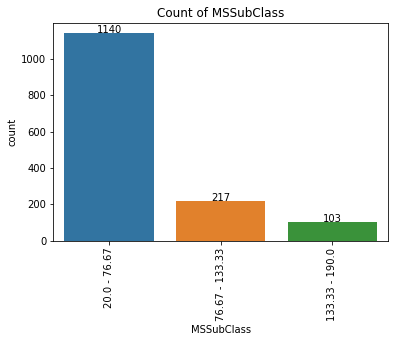

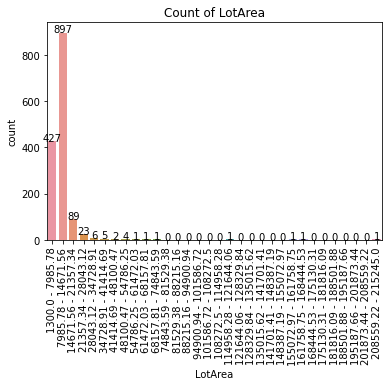

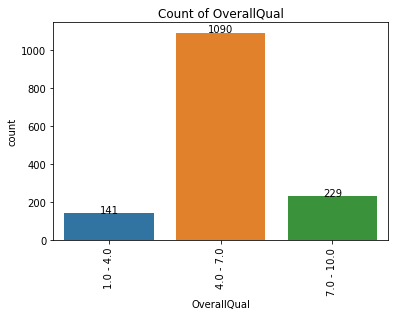

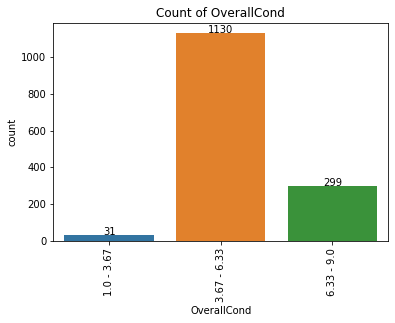

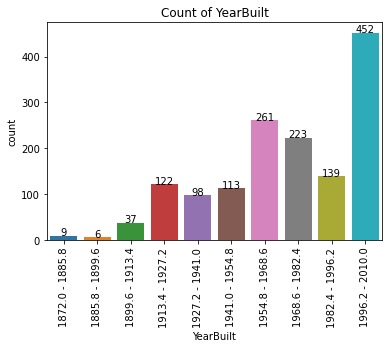

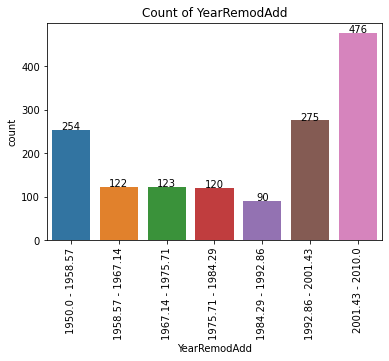

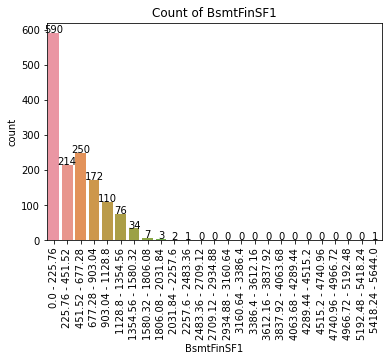

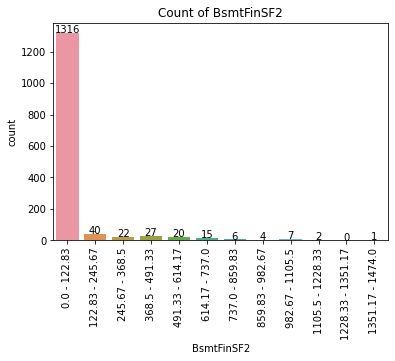

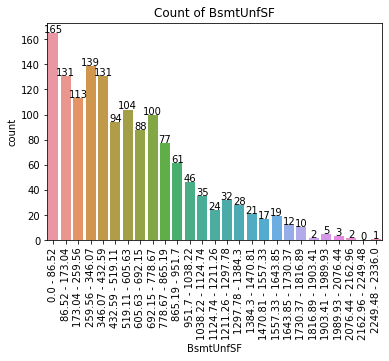

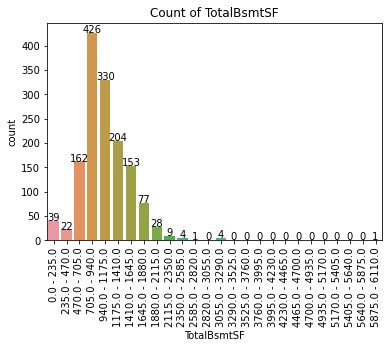

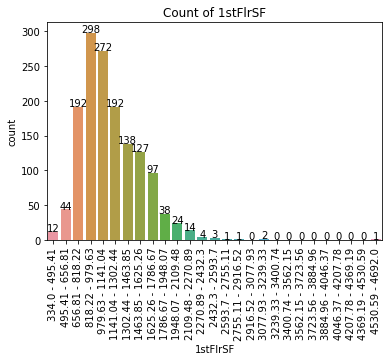

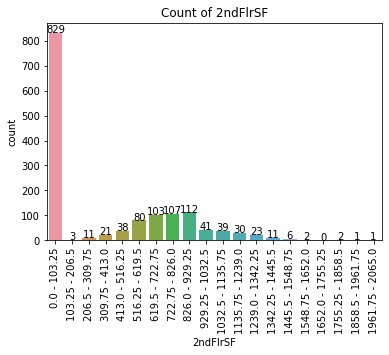

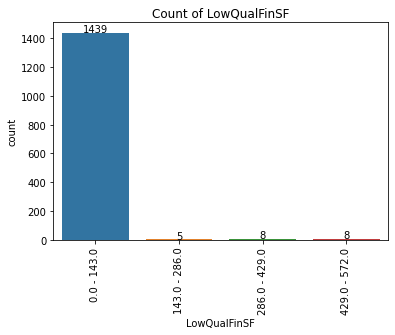

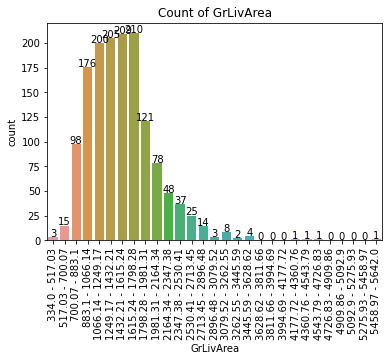

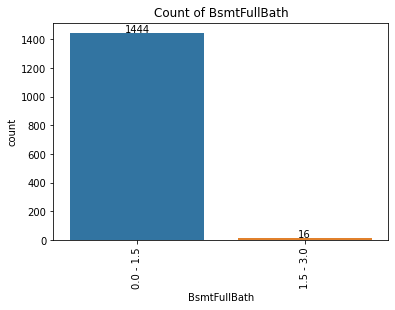

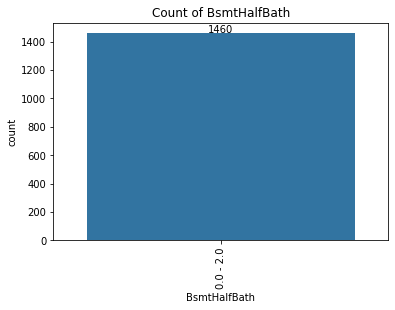

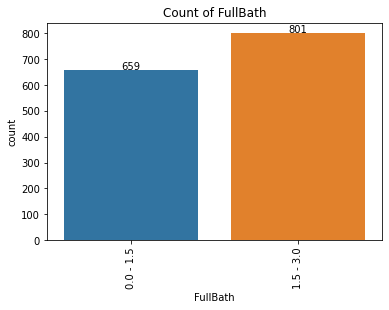

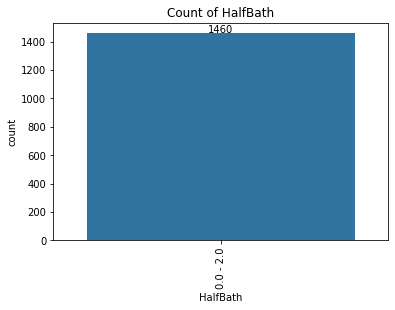

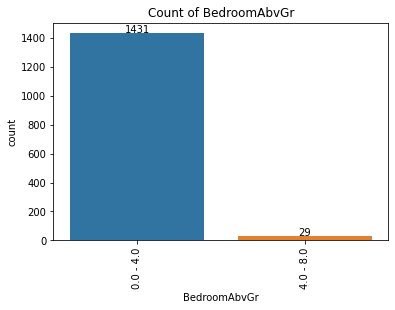

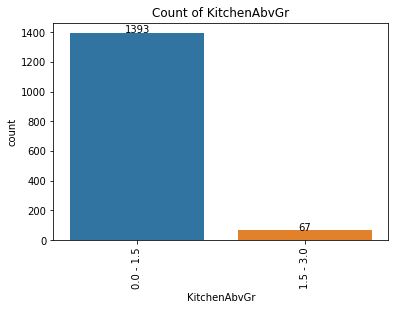

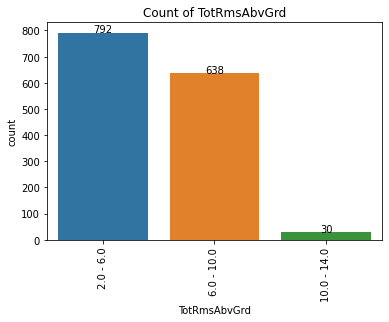

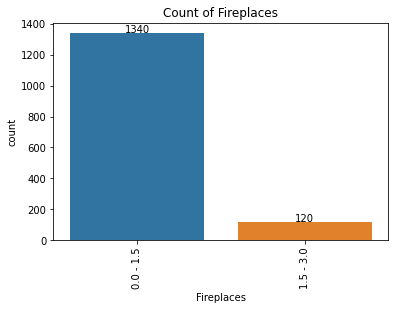

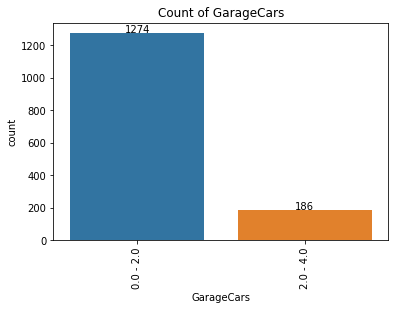

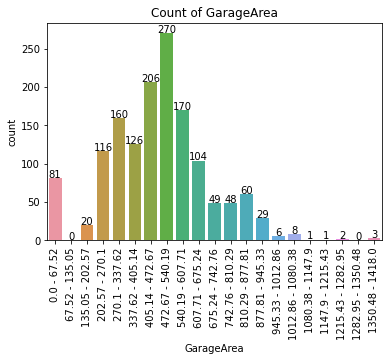

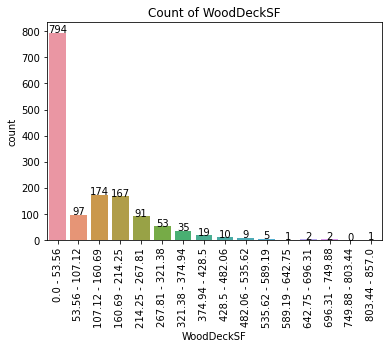

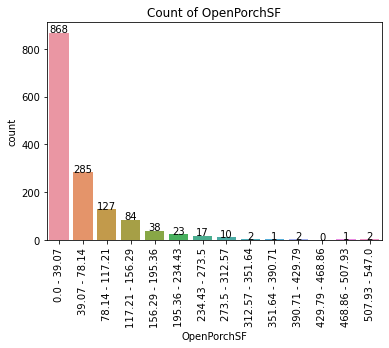

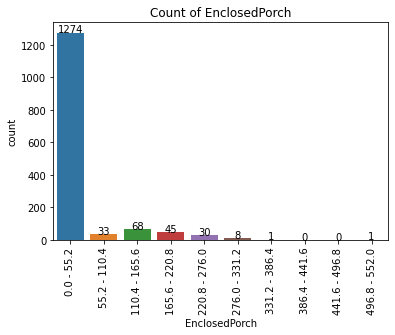

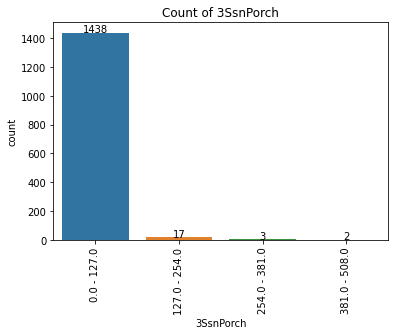

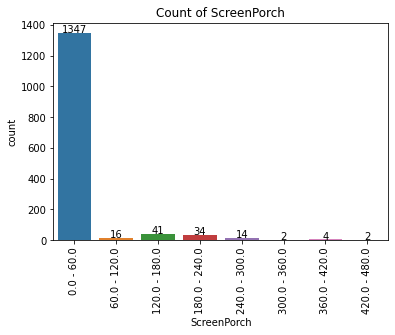

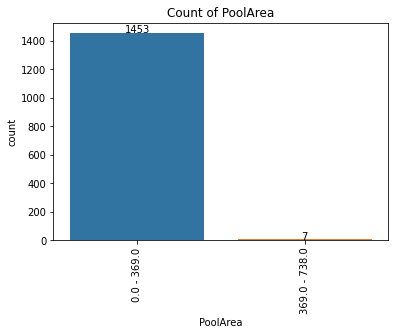

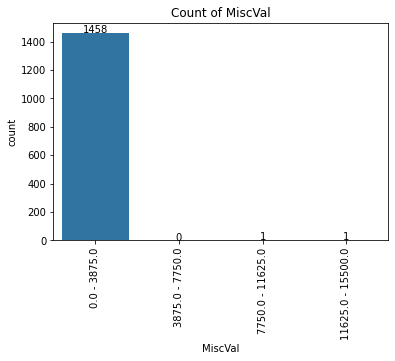

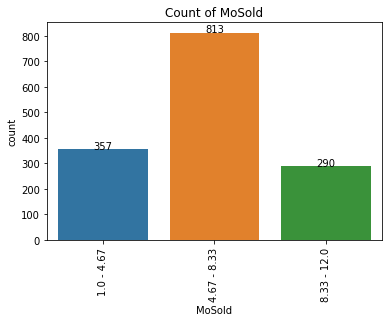

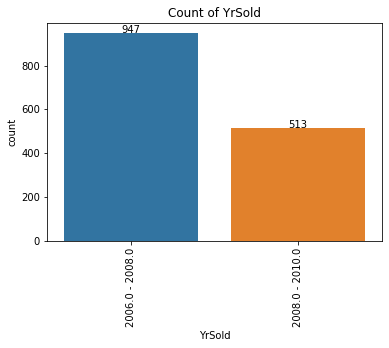

In [339]:
#Applying binning and hist plot for all the non-categorical values to understand more about outliers and distribution within the variables
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0 and i != "Id":
    names = []
    values = []
    temp_df = pd.DataFrame()

    #Performing binning
    bins = np.linspace(min(training_set[i]), max(training_set[i]), int(math.sqrt(len(training_set[i].unique()))) + 1)
    for j in range(0,len(bins) - 1):
      names.append(str(round(bins[j],2)) + " - " + str(round(bins[j+1],2)))
    temp_df["data"] = pd.cut(training_set[i], bins,labels=names, include_lowest=True)
    
    #Re-arranging lists from value counts 
    key = temp_df["data"].value_counts().index.tolist()
    value = list(temp_df["data"].value_counts())
    for name in names:
      values.append(value[key.index(name)])

    #Plotting a barplot
    fig, axs = plt.subplots(1)
    ax = sns.barplot(x=names, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Count of " + i )
    ax.set_xlabel(i)
    ax.set_ylabel("count")
    cnt = 0
    BarPlotCount(ax,values)
    plt.show()

    

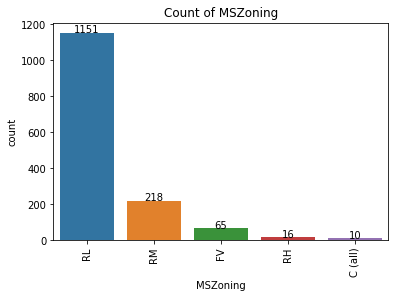

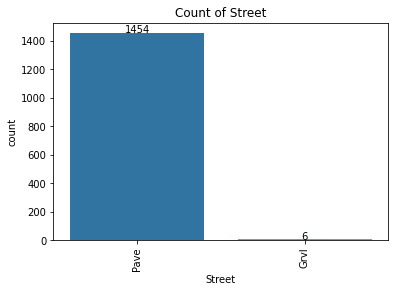

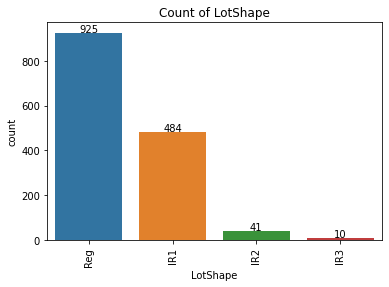

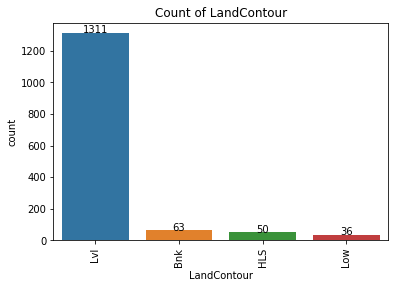

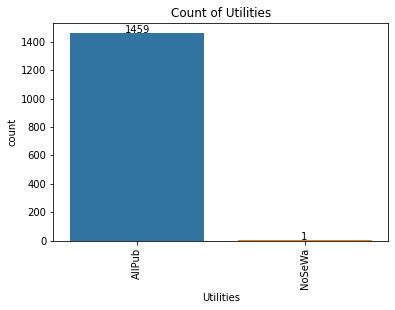

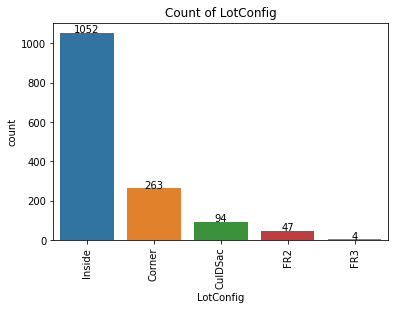

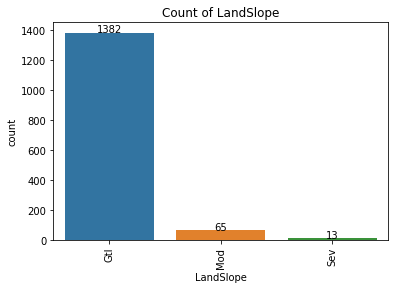

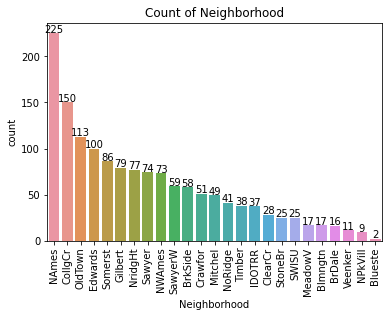

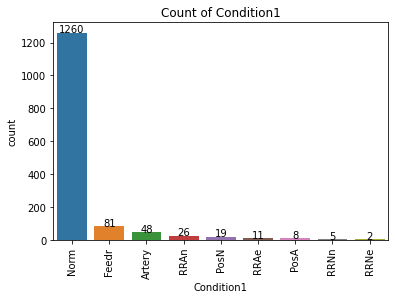

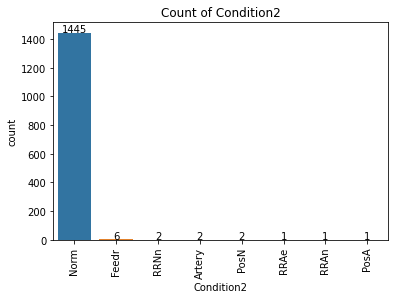

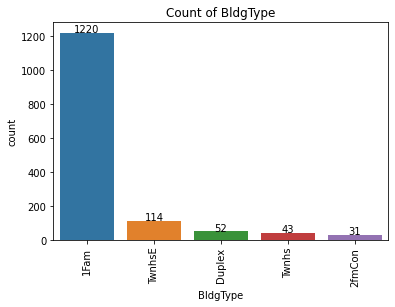

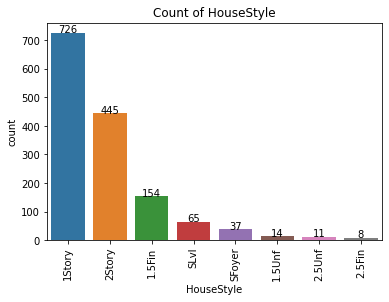

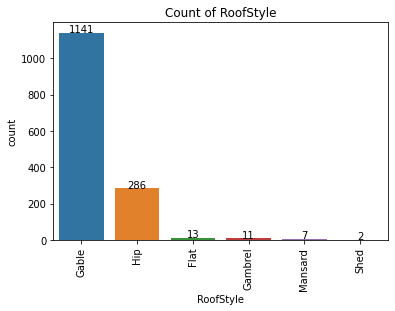

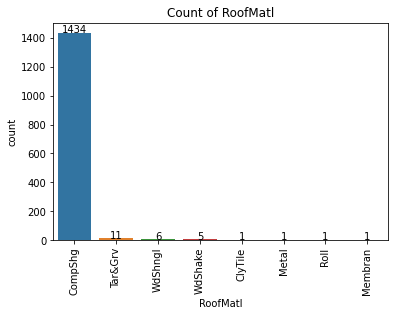

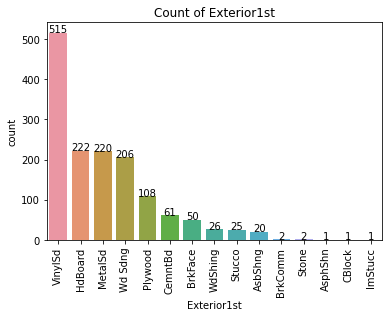

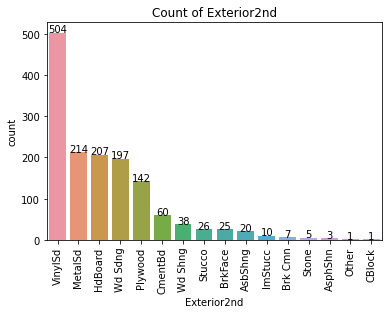

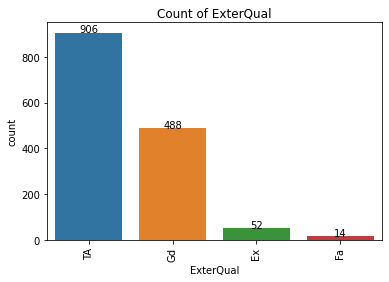

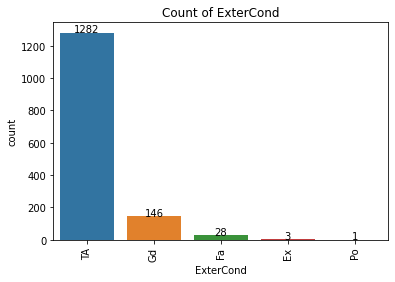

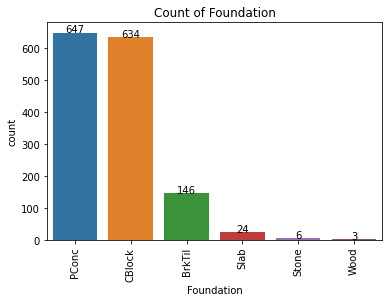

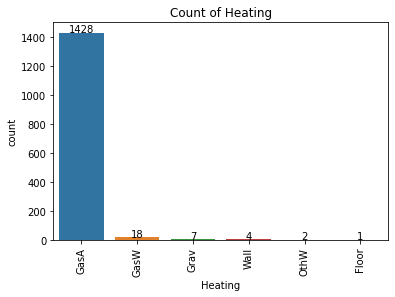

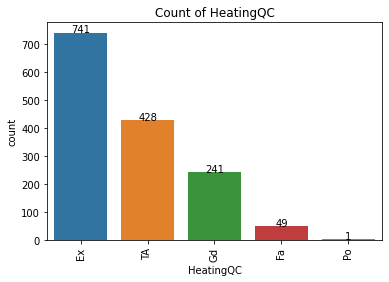

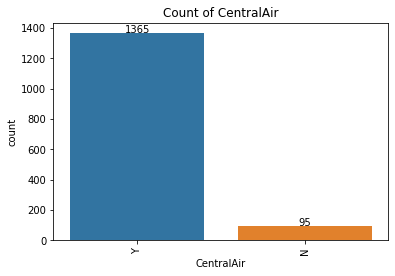

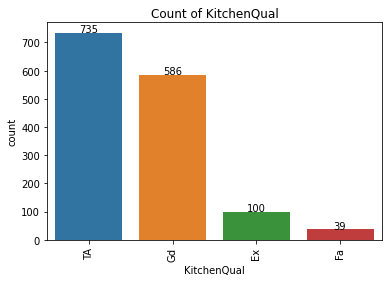

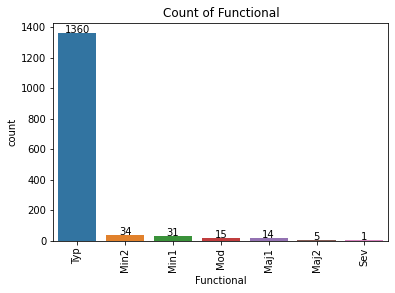

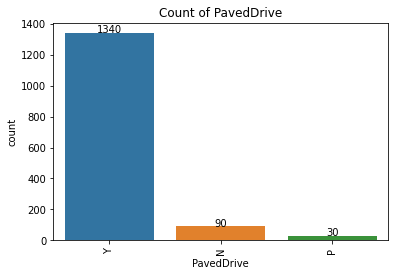

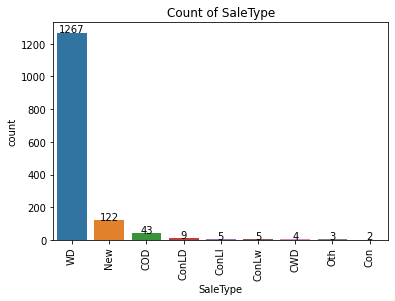

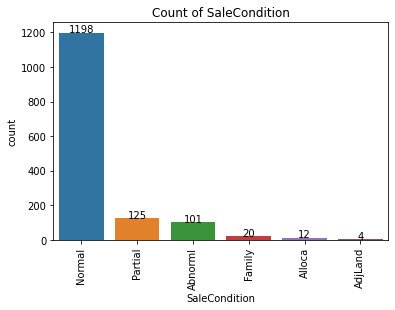

In [340]:
#Finding out the same count for categorical values 
for i in test_set.select_dtypes(include=['object']).columns:
  if training_set[i].isna().sum() == 0:
    
    names = training_set[i].value_counts().index.tolist()
    values = list(training_set[i].value_counts())
    
    #Plotting a barplot
    fig, axs = plt.subplots(1)
    ax = sns.barplot(x=names, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Count of " + i )
    ax.set_xlabel(i)
    ax.set_ylabel("count")
    #Print count on top of bar plots
    BarPlotCount(ax,values)
    plt.show()


In [341]:
#Data Wrangling
train_Y = training_set.iloc[:, -1]
training_set.drop(labels="SalePrice", axis=1, inplace= True)
#1.count of null values in every row and column and store in a dictionary for future purposes

NullCountDict = {}
for column in training_set.isna().columns.values.tolist():
  print("\n"+ column)

  names = training_set[column].isna().value_counts().index.tolist()
  values = training_set[column].isna().value_counts().tolist()
  total = sum(values)

  if True in names:
    TrueCount = values[names.index(True)]
    print("Null values = ", TrueCount)
    print("Null value percentage = %.2f"% ((TrueCount/total)*100) + "%")
    NullCountDict[column] = round((TrueCount/total)*100,2)
  else:
    print("Null values = 0")
    print("Null value percentage = 0.0%")
    NullCountDict[column] = 0



Id
Null values = 0
Null value percentage = 0.0%

MSSubClass
Null values = 0
Null value percentage = 0.0%

MSZoning
Null values = 0
Null value percentage = 0.0%

LotFrontage
Null values =  259
Null value percentage = 17.74%

LotArea
Null values = 0
Null value percentage = 0.0%

Street
Null values = 0
Null value percentage = 0.0%

Alley
Null values =  1369
Null value percentage = 93.77%

LotShape
Null values = 0
Null value percentage = 0.0%

LandContour
Null values = 0
Null value percentage = 0.0%

Utilities
Null values = 0
Null value percentage = 0.0%

LotConfig
Null values = 0
Null value percentage = 0.0%

LandSlope
Null values = 0
Null value percentage = 0.0%

Neighborhood
Null values = 0
Null value percentage = 0.0%

Condition1
Null values = 0
Null value percentage = 0.0%

Condition2
Null values = 0
Null value percentage = 0.0%

BldgType
Null values = 0
Null value percentage = 0.0%

HouseStyle
Null values = 0
Null value percentage = 0.0%

OverallQual
Null values = 0
Null value perce

In [342]:
#Analysing data from null columns
NACols = [(key, NullCountDict[key]) for key in NullCountDict if NullCountDict[key] > 0]
NACols

[('LotFrontage', 17.74),
 ('Alley', 93.77),
 ('MasVnrType', 0.55),
 ('MasVnrArea', 0.55),
 ('BsmtQual', 2.53),
 ('BsmtCond', 2.53),
 ('BsmtExposure', 2.6),
 ('BsmtFinType1', 2.53),
 ('BsmtFinType2', 2.6),
 ('Electrical', 0.07),
 ('FireplaceQu', 47.26),
 ('GarageType', 5.55),
 ('GarageYrBlt', 5.55),
 ('GarageFinish', 5.55),
 ('GarageQual', 5.55),
 ('GarageCond', 5.55),
 ('PoolQC', 99.52),
 ('Fence', 80.75),
 ('MiscFeature', 96.3)]

In [343]:
NullCountCombinedDict = {}

#Let concat test set and training set, to perform equal transformations
combined_set = pd.concat([training_set, test_set])
for column in combined_set.isna().columns.values.tolist():
  print("\n"+ column)

  names = combined_set[column].isna().value_counts().index.tolist()
  values = combined_set[column].isna().value_counts().tolist()
  total = sum(values)

  if True in names:
    TrueCount = values[names.index(True)]
    print("Null values = ", TrueCount)
    print("Null value percentage = %.2f"% ((TrueCount/total)*100) + "%")
    NullCountCombinedDict[column] = round((TrueCount/total)*100,2)
  else:
    print("Null values = 0")
    print("Null value percentage = 0.0%")
    NullCountCombinedDict[column] = 0



Id
Null values = 0
Null value percentage = 0.0%

MSSubClass
Null values = 0
Null value percentage = 0.0%

MSZoning
Null values =  4
Null value percentage = 0.14%

LotFrontage
Null values =  486
Null value percentage = 16.65%

LotArea
Null values = 0
Null value percentage = 0.0%

Street
Null values = 0
Null value percentage = 0.0%

Alley
Null values =  2721
Null value percentage = 93.22%

LotShape
Null values = 0
Null value percentage = 0.0%

LandContour
Null values = 0
Null value percentage = 0.0%

Utilities
Null values =  2
Null value percentage = 0.07%

LotConfig
Null values = 0
Null value percentage = 0.0%

LandSlope
Null values = 0
Null value percentage = 0.0%

Neighborhood
Null values = 0
Null value percentage = 0.0%

Condition1
Null values = 0
Null value percentage = 0.0%

Condition2
Null values = 0
Null value percentage = 0.0%

BldgType
Null values = 0
Null value percentage = 0.0%

HouseStyle
Null values = 0
Null value percentage = 0.0%

OverallQual
Null values = 0
Null value p

In [344]:
def fillNA(df, column, value):
  df[column].fillna(value = value, inplace = True)

def fillNAmode(df, column):
  df[column].fillna(value = df[column].mode()[0], inplace = True)


In [345]:
#Show only those columns having an NA value
NACombinedCols = [(key, NullCountCombinedDict[key]) for key in NullCountCombinedDict\
                  if NullCountCombinedDict[key] > 0]
print(NACombinedCols)


#Dropping Pool QC as the number of NAs is 99%
combined_set.drop("PoolQC", axis = 1, inplace=True)

#Can change value of Garage area and Garage cars and GarageType as 0 as NA represents 0 area and year respectively
fillNA(combined_set, "GarageArea", 0)
fillNA(combined_set, "GarageCars", 0)
fillNA(combined_set, "GarageYrBlt", 0)
#combined_set_1["GarageArea"].fillna(value = 0, inplace = True)
#combined_set_1["GarageCars"].fillna(value = 0, inplace = True)
#combined_set_1["GarageYrBlt"].fillna(value = 0, inplace = True)

#Can change value of Garage Type and Garage Yr Blt as No as NA represents it was never built
fillNA(combined_set, "GarageType", "No")
fillNA(combined_set, "GarageCond", "No")
fillNA(combined_set, "GarageQual", "No")
fillNA(combined_set, "GarageFinish", "No")

#For Utilities we can fillNA column as AllPub is the highest value
fillNAmode(combined_set, "Utilities")

#For Exterior1st we can fillNA column as VinylSd is the highest value
fillNAmode(combined_set, "Exterior1st")
fillNAmode(combined_set, "Exterior2nd")

#For MSZoning we can fill the most common value that is the RL value
fillNAmode(combined_set, "MSZoning")


#Filling LotFrontage by grouping Neighborhood by mean
combined_set["LotFrontage"] = combined_set["LotFrontage"].fillna(combined_set.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean())))

#Filling Alley with value as "No" as the count of NA represents a seperate value
fillNA(combined_set, "Alley", "No")


#Filling MasVnrType as using mode of MasVnrArea
fillNAmode(combined_set, "MasVnrType")
combined_set["MasVnrArea"] = combined_set["MasVnrArea"].fillna(combined_set.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.mean())))

#Filling below columns with No as they represent a different valueset
fillNA(combined_set, "BsmtQual", "No")
fillNA(combined_set, "BsmtCond", "No")
fillNA(combined_set, "BsmtExposure", "Other")
fillNA(combined_set, "BsmtFinType1", "No")
fillNA(combined_set, "BsmtFinType2", "No")
fillNA(combined_set, "BsmtFinSF1", 0)
fillNA(combined_set, "BsmtFinSF2", 0)
fillNA(combined_set, "TotalBsmtSF", 0)
fillNA(combined_set, "BsmtUnfSF", 0)

#Filling Electrical with mode 
fillNAmode(combined_set, "Electrical")


#Filling BsmtFullBath and BsmtHalfBath with 0 as they are empty columns
fillNA(combined_set, "BsmtFullBath", 0)
fillNA(combined_set, "BsmtHalfBath", 0)

#Filling KitchenQual, SaleType and Functional with mode
fillNAmode(combined_set, "KitchenQual")
fillNAmode(combined_set, "Functional")
fillNAmode(combined_set, "SaleType")

#Filling FireplaceQu with No 
fillNA(combined_set, "FireplaceQu", "No")
fillNA(combined_set, "Fence", "No")
fillNA(combined_set, "MiscFeature", "No")




[('MSZoning', 0.14), ('LotFrontage', 16.65), ('Alley', 93.22), ('Utilities', 0.07), ('Exterior1st', 0.03), ('Exterior2nd', 0.03), ('MasVnrType', 0.82), ('MasVnrArea', 0.79), ('BsmtQual', 2.77), ('BsmtCond', 2.81), ('BsmtExposure', 2.81), ('BsmtFinType1', 2.71), ('BsmtFinSF1', 0.03), ('BsmtFinType2', 2.74), ('BsmtFinSF2', 0.03), ('BsmtUnfSF', 0.03), ('TotalBsmtSF', 0.03), ('Electrical', 0.03), ('BsmtFullBath', 0.07), ('BsmtHalfBath', 0.07), ('KitchenQual', 0.03), ('Functional', 0.07), ('FireplaceQu', 48.65), ('GarageType', 5.38), ('GarageYrBlt', 5.45), ('GarageFinish', 5.45), ('GarageCars', 0.03), ('GarageArea', 0.03), ('GarageQual', 5.45), ('GarageCond', 5.45), ('PoolQC', 99.66), ('Fence', 80.44), ('MiscFeature', 96.4), ('SaleType', 0.03)]


In [346]:
#Finding Skewed columns
combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values()

GarageYrBlt      -3.908213
YearBuilt        -0.600114
YearRemodAdd     -0.451252
GarageCars       -0.219694
Id                0.000000
YrSold            0.132467
FullBath          0.167692
MoSold            0.195985
OverallQual       0.197212
GarageArea        0.239380
BedroomAbvGr      0.326492
OverallCond       0.570605
BsmtFullBath      0.625153
HalfBath          0.694924
Fireplaces        0.733872
TotRmsAbvGrd      0.758757
2ndFlrSF          0.862118
BsmtUnfSF         0.919812
TotalBsmtSF       1.157489
GrLivArea         1.270010
MSSubClass        1.376165
BsmtFinSF1        1.425963
LotFrontage       1.461180
1stFlrSF          1.470360
WoodDeckSF        1.843380
OpenPorchSF       2.536417
MasVnrArea        2.615022
BsmtHalfBath      3.933616
ScreenPorch       3.948723
EnclosedPorch     4.005950
BsmtFinSF2        4.148275
KitchenAbvGr      4.304467
3SsnPorch        11.381914
LowQualFinSF     12.094977
LotArea          12.829025
PoolArea         16.907017
MiscVal          21.958480
d

In [347]:
#Splitting into Keys and Values by using filter and map
values = combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values().tolist()
keys = combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values().index.tolist()
combination = filter(lambda x: x[1] > 1 or x[1] < -1 , zip(keys, values))
keys,values = map(list,zip(*combination))

#Applying boxcox1p to reduce the skewness factor
for key in keys:
  combined_set[key] = boxcox1p(combined_set[key], boxcox_normmax(combined_set[key]+ 1))

#Again checking the skewness factor. 
combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values()


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


YearBuilt        -0.600114
YearRemodAdd     -0.451252
GarageCars       -0.219694
LotArea          -0.135470
1stFlrSF         -0.011617
Id                0.000000
GrLivArea         0.004851
LotFrontage       0.027098
YrSold            0.132467
FullBath          0.167692
MoSold            0.195985
OverallQual       0.197212
GarageArea        0.239380
BedroomAbvGr      0.326492
TotalBsmtSF       0.369852
BsmtFinSF1        0.374894
MSSubClass        0.437648
OverallCond       0.570605
OpenPorchSF       0.621345
BsmtFullBath      0.625153
HalfBath          0.694924
GarageYrBlt       0.701562
Fireplaces        0.733872
TotRmsAbvGrd      0.758757
WoodDeckSF        0.785172
2ndFlrSF          0.862118
BsmtUnfSF         0.919812
MasVnrArea        0.969540
EnclosedPorch     2.151263
BsmtFinSF2        2.580794
ScreenPorch       3.155533
KitchenAbvGr      3.781840
BsmtHalfBath      3.782904
MiscVal           5.242589
LowQualFinSF      8.499971
3SsnPorch         8.869703
PoolArea         14.993700
d

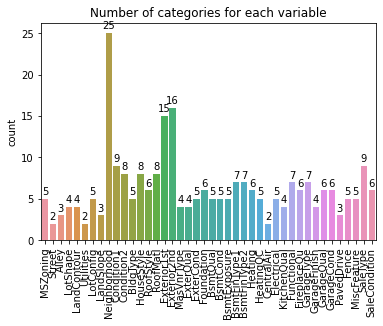

In [348]:
#Checking the number of categories in each categorical variables, so if it exceeds a range we can delete that category. We find that the n
cols = combined_set.select_dtypes(include=['object']).columns.tolist()
counts = [len(combined_set[col].value_counts().index.tolist()) for col in cols]
ax = sns.barplot(x = cols, y = counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of categories for each variable")
ax.set_ylabel("count")
BarPlotCount(ax,counts)
plt.show()

In [349]:
#Filling categorical variables with dummies
combined_set = pd.get_dummies(combined_set, columns = cols, drop_first=True)
combined_set.shape

(2919, 257)

In [351]:
#Splitting training and testing set
training_set = combined_set.iloc[:1460,:]
test_set = combined_set.iloc[1460:,:]

In [354]:
training_set.shape
test_set.shape

(1459, 257)